<a href="https://colab.research.google.com/github/giuliabugatti09/sentiment-analysis-comments/blob/main/C%C3%B3pia_de_giuliabugatti09_sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

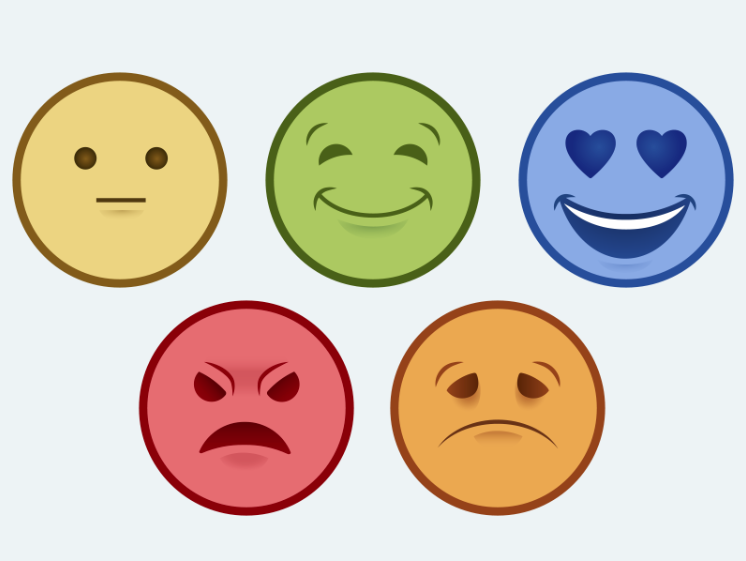

# **Análise de Sentimentos com Naive Bayes 🙂**

## 1. Sobre o projeto
Este projeto tem como objetivo realizar a análise de sentimentos em resenhas de filmes utilizando o algoritmo Naive Bayes. O modelo foi treinado com o dataset IMDb disponibilizado pelo NLTK, e classifica as resenhas como positivas ou negativas.

Neste projeto, usamos o Naive Bayes para treinar um modelo de classificação de texto e prever o sentimento de resenhas de filmes. O dataset utilizado é composto por resenhas de filmes e seus respectivos sentimentos (positivo ou negativo).

## 2. Carregando os dados

### 2.1- Importando as bibliotecas

In [1]:
import pandas as pd
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
import seaborn as sns
import matplotlib.pyplot as plt

# 3.- Visualização de dados

### 3.1 - Gráfico de Acurácia

O código gera um **gráfico de linha** que exibe a evolução da acurácia de um modelo de aprendizado de máquina ao longo do treinamento, **variando de 1 a 10 amostras de treino**. Ele plota a linha com marcadores, adiciona rótulos de acurácia em cada ponto, e **personaliza o gráfico** com título, rótulos nos eixos X e Y, e uma legenda. O gráfico também inclui uma grade para facilitar a leitura e define os valores específicos para os eixos. Por fim, o gráfico é **salvo como uma imagem no formato PNG** e é exibido.

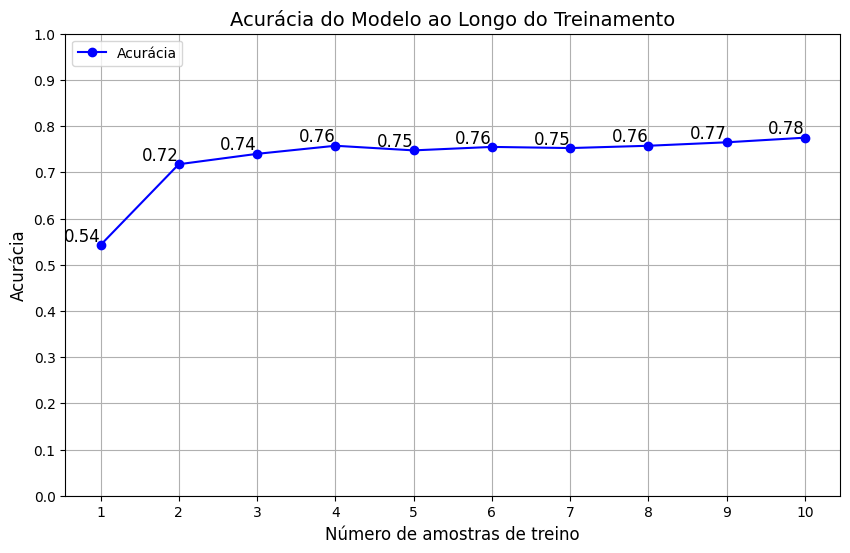

In [ ]:
# Salvar o gráfico como imagem
plt.figure(figsize=(10, 6))

# Plotando a linha do gráfico
plt.plot(range(1, 11), accuracies, marker='o', linestyle='-', color='b', label='Acurácia')

# Adicionando rótulos de acurácia nos pontos
for i, acc in enumerate(accuracies):
    plt.text(i + 1, acc, f'{acc:.2f}', fontsize=12, ha='right', va='bottom', color='black')

# Adicionando título e rótulos
plt.title('Acurácia do Modelo ao Longo do Treinamento', fontsize=14)
plt.xlabel('Número de amostras de treino', fontsize=12)
plt.ylabel('Acurácia', fontsize=12)

# Personalizando o gráfico
plt.grid(True)  # Adiciona linhas de grade para melhorar a leitura
plt.xticks(range(1, 11))  # Define os valores do eixo X
plt.yticks([x / 10 for x in range(0, 11)])  # Define os valores do eixo Y

# Adicionando legenda
plt.legend(loc='upper left')

# Salvar o gráfico em um arquivo .png
plt.savefig('acuracia_do_modelo.png', format='png', bbox_inches='tight')

# Mostrar o gráfico
plt.show()

### 3.2- Matriz de confusão

O código realiza análise de sentimentos em resenhas de filmes, usando o corpus `movie_reviews` do NLTK. Ele pré-processa os dados, treina um modelo de Naive Bayes Multinomial e avalia o desempenho com o `classification_report`. Também gera e plota uma matriz de confusão com porcentagens, mostrando a precisão das previsões.

[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!


                                          comentario sentimento
0  plot : two teen couples go to a church party ,...        neg
1  the happy bastard ' s quick movie review damn ...        neg
2  it is movies like these that make a jaded movi...        neg
3  " quest for camelot " is warner bros . ' first...        neg
4  synopsis : a mentally unstable man undergoing ...        neg
              precision    recall  f1-score   support

         neg       0.77      0.85      0.81       199
         pos       0.83      0.75      0.79       201

    accuracy                           0.80       400
   macro avg       0.80      0.80      0.80       400
weighted avg       0.80      0.80      0.80       400



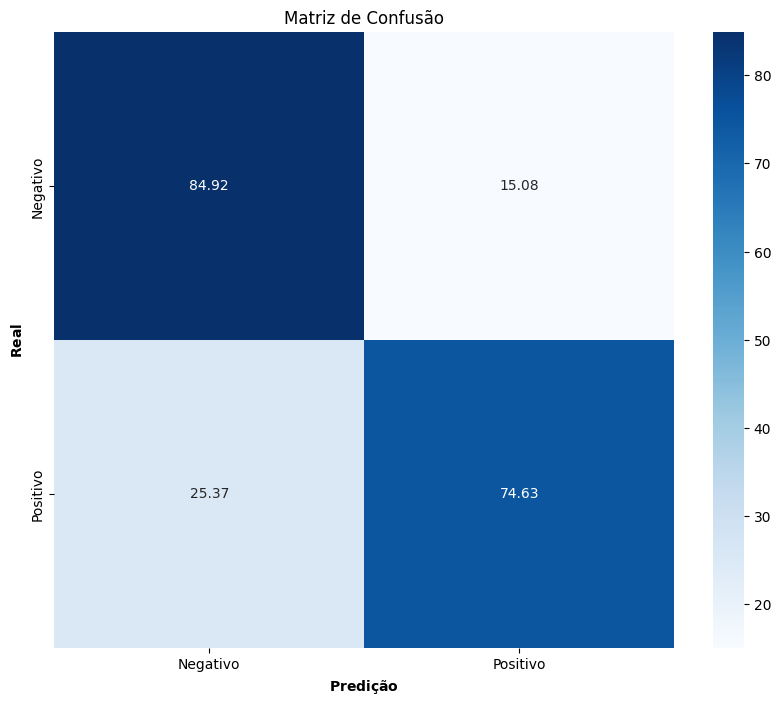

In [ ]:


# Baixar e carregar o dataset
nltk.download('movie_reviews')
from nltk.corpus import movie_reviews

# Criar o DataFrame
data = pd.DataFrame({
    'comentario': [' '.join(movie_reviews.words(fileid)) for fileid in movie_reviews.fileids()],
    'sentimento': [fileid.split('/')[0] for fileid in movie_reviews.fileids()]
})

# Visualizar as primeiras linhas
print(data.head())

# Pré-processamento
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(data['comentario'])
y = data['sentimento']

# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinar o modelo
model = MultinomialNB()
model.fit(X_train, y_train)

# Fazer previsões
y_pred = model.predict(X_test)

# Avaliação
print(classification_report(y_test, y_pred))

# Matriz de confusão com porcentagens
conf_matrix = confusion_matrix(y_test, y_pred, labels=['neg', 'pos'])
conf_matrix_percent = (conf_matrix / conf_matrix.sum(axis=1, keepdims=True)) * 100

# Plotar a matriz de confusão detalhada
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_percent, annot=True, fmt='.2f', cmap='Blues', xticklabels=['Negativo', 'Positivo'], yticklabels=['Negativo', 'Positivo'])
plt.title('Matriz de Confusão')
plt.xlabel(r'$\bf{Predição}$')
plt.ylabel(r'$\bf{Real}$')
plt.show()


### 3.3- Métricas de desempenho

O código realiza análise de sentimentos em resenhas de filmes, utilizando o corpus `movie_reviews` do NLTK. Após pré-processar os dados e treinar um modelo de Naive Bayes Multinomial, ele avalia o modelo gerando um relatório de métricas (precisão, recall, F1-score) por classe (positiva e negativa). Essas métricas são organizadas em um DataFrame e plotadas em um gráfico de barras, exibindo o desempenho do modelo para cada classe.

[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!


                                          comentario sentimento
0  plot : two teen couples go to a church party ,...        neg
1  the happy bastard ' s quick movie review damn ...        neg
2  it is movies like these that make a jaded movi...        neg
3  " quest for camelot " is warner bros . ' first...        neg
4  synopsis : a mentally unstable man undergoing ...        neg


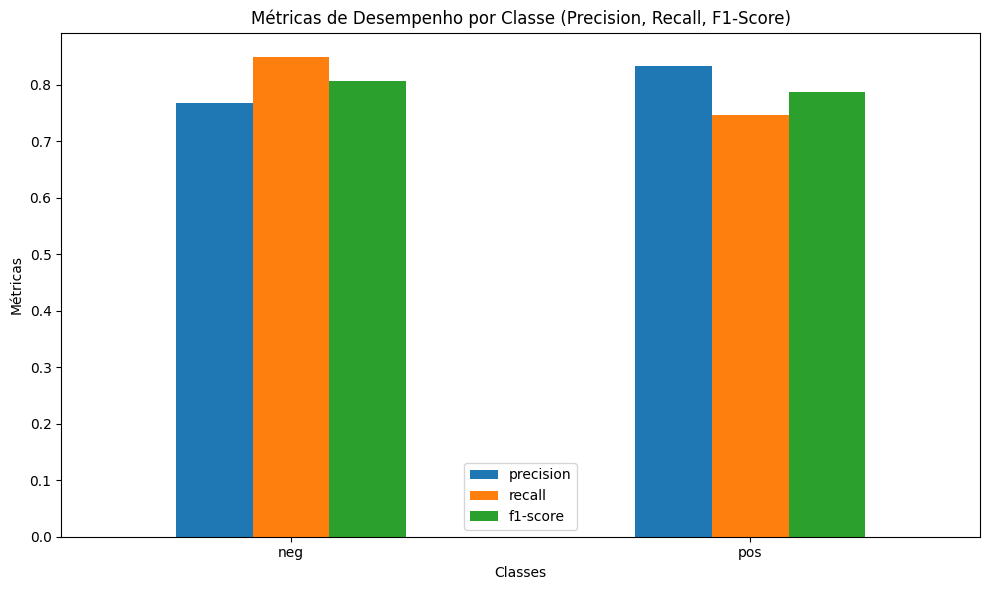

In [ ]:


# Baixar e carregar o dataset
nltk.download('movie_reviews')
from nltk.corpus import movie_reviews

# Criar o DataFrame
data = pd.DataFrame({
    'comentario': [' '.join(movie_reviews.words(fileid)) for fileid in movie_reviews.fileids()],
    'sentimento': [fileid.split('/')[0] for fileid in movie_reviews.fileids()]
})

# Visualizar as primeiras linhas
print(data.head())

# Pré-processamento
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(data['comentario'])
y = data['sentimento']

# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinar o modelo
model = MultinomialNB()
model.fit(X_train, y_train)

# Fazer previsões
y_pred = model.predict(X_test)

# Avaliação
report = classification_report(y_test, y_pred, output_dict=True)

# Converter o relatório para um DataFrame para visualização
metrics = pd.DataFrame(report).transpose()

# Selecionar as métricas que desejamos plotar
metrics = metrics.loc[['neg', 'pos'], ['precision', 'recall', 'f1-score']]

# Plotar as métricas
metrics.plot(kind='bar', figsize=(10, 6))
plt.title('Métricas de Desempenho por Classe (Precision, Recall, F1-Score)')
plt.xlabel('Classes')
plt.ylabel('Métricas')
plt.xticks(rotation=0)
plt.tight_layout()

# Exibir o gráfico
plt.show()


## 4. Fluxograma do projeto- interativo

In [ ]:
import plotly.graph_objects as go

# Dados para o gráfico
nodes = [
    "Carregamento dos Dados",
    "Pré-processamento",
    "Treinamento do Modelo",
    "Avaliação do Modelo",
    "Previsão"
]
edges = [
    ("Carregamento dos Dados", "Pré-processamento"),
    ("Pré-processamento", "Treinamento do Modelo"),
    ("Treinamento do Modelo", "Avaliação do Modelo"),
    ("Avaliação do Modelo", "Previsão")
]
values = [100, 90, 80, 75]  # Exemplo de valores (quantidade de dados em cada etapa)

# Criar índices dos nodes
sources = [nodes.index(edge[0]) for edge in edges]
targets = [nodes.index(edge[1]) for edge in edges]

# Configurar o Sankey Diagram
fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=20,
        thickness=30,
        line=dict(color="black", width=0.8),
        label=nodes,
        color=["#636EFA", "#EF553B", "#00CC96", "#AB63FA", "#FFA15A"]  # Cores personalizadas
    ),
    link=dict(
        source=sources,
        target=targets,
        value=values,
        color="rgba(100, 149, 237, 0.4)"  # Cor translúcida das conexões
    )
)])

# Configurações do layout
fig.update_layout(
    title_text="Fluxograma do Projeto: Análise de Sentimentos",
    title_font_size=20,
    font=dict(size=14),
    height=600,
    width=900,
    margin=dict(l=50, r=50, t=50, b=50),
    paper_bgcolor="white",
    plot_bgcolor="white"
)

# Mostrar o gráfico
fig.show()


### 5. Exemplo de entrada e saída

5 exemplos de entrada e saída, juntamente com o sentimento envolvido do comentário

[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!


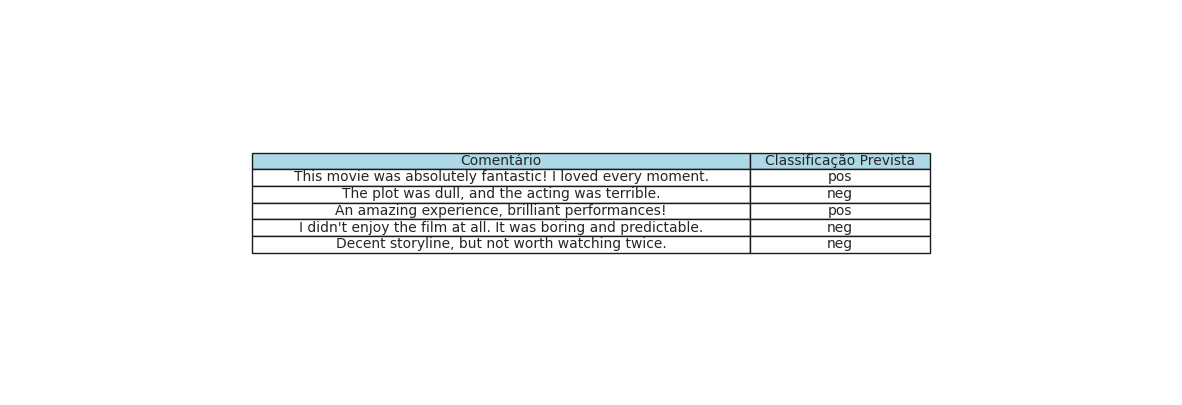

In [ ]:


# Baixar e carregar o dataset
nltk.download('movie_reviews')
from nltk.corpus import movie_reviews

# Criar o DataFrame
data = pd.DataFrame({
    'comentario': [' '.join(movie_reviews.words(fileid)) for fileid in movie_reviews.fileids()],
    'sentimento': [fileid.split('/')[0] for fileid in movie_reviews.fileids()]
})

# Pré-processamento
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(data['comentario'])
y = data['sentimento']

# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinar o modelo
model = MultinomialNB()
model.fit(X_train, y_train)

# Exemplo de entrada e saída
exemplos = pd.DataFrame({
    "Comentário": [
        "This movie was absolutely fantastic! I loved every moment.",
        "The plot was dull, and the acting was terrible.",
        "An amazing experience, brilliant performances!",
        "I didn't enjoy the film at all. It was boring and predictable.",
        "Decent storyline, but not worth watching twice."
    ],
    "Classificação Prevista": model.predict(vectorizer.transform([
        "This movie was absolutely fantastic! I loved every moment.",
        "The plot was dull, and the acting was terrible.",
        "An amazing experience, brilliant performances!",
        "I didn't enjoy the film at all. It was boring and predictable.",
        "Decent storyline, but not worth watching twice."
    ]))
})

# Configurar estilo do Seaborn
sns.set_theme(style="whitegrid")

# Plotar a tabela estilizada
fig, ax = plt.subplots(figsize=(15, 5))
ax.axis('tight')
ax.axis('off')
table = ax.table(
    cellText=exemplos.values,
    colLabels=exemplos.columns,
    cellLoc="center",
    loc="center",
    colColours=["#ADD8E6", "#ADD8E6"]
)

table.auto_set_font_size(False)
table.set_fontsize(10)
table.auto_set_column_width(col=list(range(len(exemplos.columns))))



# Mostrar o gráfico no Colab
plt.show()


##6. Conclusão

Este projeto demonstrou a aplicação de técnicas de processamento de linguagem natural e aprendizado de máquina para análise de sentimentos em resenhas de filmes. Utilizando o corpus `movie_reviews` do NLTK, foi treinado um modelo de Naive Bayes Multinomial para classificar as resenhas como positivas ou negativas. A avaliação do modelo foi realizada com base em métricas de precisão, recall e F1-score, sendo as métricas visualizadas através de um gráfico de barras. Os resultados indicam um bom desempenho do modelo na classificação das resenhas, mostrando como técnicas de NLP podem ser eficazes na análise de sentimentos em textos.

Agradeço pela visita ao repositório e convido você a acompanhar o progresso deste projeto. Para mais informações ou para discutir colaborações, sinta-se à vontade para me contatar pelo meu [LinkedIn.](https://www.linkedin.com/in/giulia-bugatti-fonseca-226955267/)